<center>

**Welcome to Home Price Prediction**

<img src="https://miro.medium.com/v2/resize:fit:1400/0*cDRFtpTiOJFrfzS5.jpg" width="500">

</center>


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge


<center>

**Let's Firstly Get The Path of Data**

</center>


In [3]:
Housing_Data_Path = 'train.csv'


In [4]:
def wrangle(housing_data_file):
    """
    Wrangle the housing dataset by handling missing values, encoding categorical columns,
    and exploring the data.

    Parameters:
    housing_data_file (str): The file path to the housing dataset.

    Returns:
    DataFrame: The wrangled housing dataset.
    """
    # Read the data with an announcement
    print(
        "\033[1;35m🏠 Embarking on a Real Estate Adventure: Unveiling the Mysteries of the Housing Dataset! 🏠\033[0m"
    )
    housing_data = pd.read_csv(housing_data_file)

    # Displaying the initial observations
    print(
        "\n\033[1m🔍 Overview: The First 10 Rows - A Prelude to Data Exploration\033[0m"
    )
    print(housing_data.head(10).to_string(index=False))

    # Conducting an examination of data types and missing values
    print(
        "\n\033[1m🚀 Data Exploration: Navigating Data Types and Unveiling Missing Values!\033[0m"
    )
    print(housing_data.info(show_counts=True))
    # Print summary
    print(
        "\n\033[1m🏆 Data Wrangling Triumph: A Symphony of Victory in the World of Data Exploration! 🏆\033[0m"
    )
    print("✅ The data has been Examined with Precision.")
    print(
        "✅ The Tapestry of Data Types and Missing Values has been Unraveled in an Adventure."
    )
    print(
        "✅ A Statistical Insight into the Dataset has been Bestowed upon the Analytical Minds."
    )
    print("✅ The Unwanted Columns have been Vanquished with Precision.")
    print(f"✅ And house Shape of data is {housing_data.shape}.\n")

    return housing_data

In [5]:
house = wrangle(Housing_Data_Path)
house = house.drop(columns=["Id"])

🏠 Embarking on a Real Estate Adventure: Unveiling the Mysteries of the Housing Dataset! 🏠

🔍 Overview: The First 10 Rows - A Prelude to Data Exploration
 Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoS

In [6]:
# Missinfg Values as sum
print("Missing Values by Column")
# print(f"TOTAL MISSING \n{Housing_Data.isna().sum()}\n\n")
# Print it in Percenatge
print("Percentage of Missing Values by Column")
Droping = house.isna().mean().round(4) * 100
Droping.to_frame().sort_values(by=0, ascending=False)

Missing Values by Column
Percentage of Missing Values by Column


,0
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
...,...
Heating,0.00
HeatingQC,0.00
MSZoning,0.00
1stFlrSF,0.00


In [7]:
house["Alley"].fillna("No Alley", inplace=True)
house["MasVnrType"].fillna("None", inplace=True)
house["FireplaceQu"].fillna("No Fireplace", inplace=True)
house["Fence"].fillna("No Fence", inplace=True)
house["MasVnrArea"].fillna(0, inplace=True)
house["LotFrontage"].fillna(0, inplace=True)
house["GarageType"].fillna("No Garage", inplace=True)
house["GarageFinish"].fillna("No Garage", inplace=True)
house["GarageQual"].fillna("No Garage", inplace=True)
house["GarageCond"].fillna("No Garage", inplace=True)
house["YearBuilt"] = 2024 - house["YearBuilt"]
house["YearRemodAdd"] = 2024 - house["YearRemodAdd"]
house["GarageYrBlt"] = 2024 - house["GarageYrBlt"]
house["YrSold"] = 2024 - house["YrSold"]
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['FullBath'] = house['FullBath'].astype('object')
house['HalfBath'] = house['HalfBath'].astype('object')
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype('object')
house['KitchenAbvGr'] = house['KitchenAbvGr'].astype('object')
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')
# Higest Nulls
house.drop(columns=["PoolQC", "MiscFeature"], inplace=True)

In [8]:
# Check Nulls Now
print("Missing Values by Column")
print(f"TOTAL MISSING \n{house.isna().sum()}\n\n")
# Print it in Percenatge
print("Percentage of Missing Values by Column")
Droping = house.isna().mean().round(4) * 100
Droping.to_frame().sort_values(by=0, ascending=False)


Missing Values by Column
TOTAL MISSING 
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64


Percentage of Missing Values by Column


,0
GarageYrBlt,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtQual,2.53
BsmtCond,2.53
...,...
Exterior2nd,0.00
Exterior1st,0.00
RoofMatl,0.00
RoofStyle,0.00


In [9]:
# Dummy Variables
house = pd.get_dummies(house, drop_first=True)
house

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,21,21,196.0,706,0,150,856,856,...,False,False,False,False,True,False,False,False,True,False
1,80.0,9600,48,48,0.0,978,0,284,1262,1262,...,False,False,False,False,True,False,False,False,True,False
2,68.0,11250,23,22,162.0,486,0,434,920,920,...,False,False,False,False,True,False,False,False,True,False
3,60.0,9550,109,54,0.0,216,0,540,756,961,...,False,False,False,False,True,False,False,False,False,False
4,84.0,14260,24,24,350.0,655,0,490,1145,1145,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,25,24,0.0,0,0,953,953,953,...,False,False,False,False,True,False,False,False,True,False
1456,85.0,13175,46,36,119.0,790,163,589,1542,2073,...,False,False,False,False,True,False,False,False,True,False
1457,66.0,9042,83,18,0.0,275,0,877,1152,1188,...,False,False,False,False,True,False,False,False,True,False
1458,68.0,9717,74,28,0.0,49,1029,0,1078,1078,...,False,False,False,False,True,False,False,False,True,False


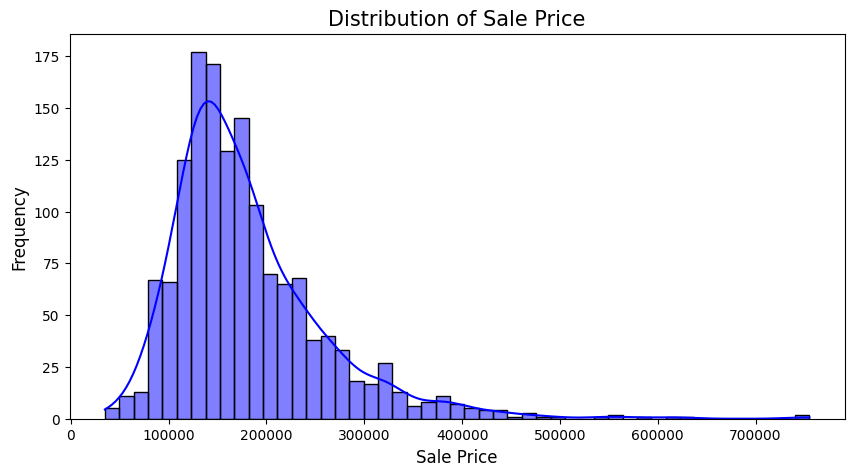

In [10]:
# Plot Salaries
plt.figure(figsize=(10, 5))
sns.histplot(house['SalePrice'], kde=True, color='blue')
plt.title('Distribution of Sale Price', fontsize=15)
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

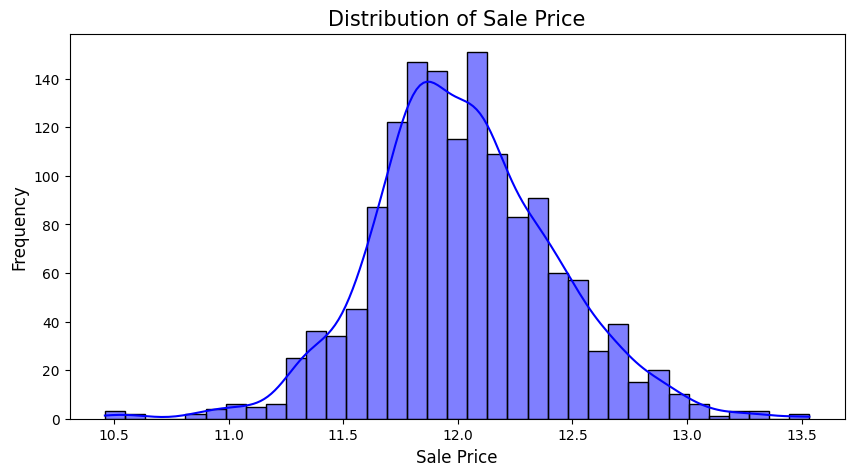

In [11]:
# Log Transformation
house['SalePrice'] = np.log1p(house['SalePrice'])
# Plot again
plt.figure(figsize=(10, 5))
sns.histplot(house['SalePrice'], kde=True, color='blue')
plt.title('Distribution of Sale Price', fontsize=15)
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [12]:
# X and y
X = house.drop(columns=['SalePrice'])
y = house['SalePrice']
X = X.fillna(X.interpolate())
X

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,21,21,196.0,706,0,150,856,856,...,False,False,False,False,True,False,False,False,True,False
1,80.0,9600,48,48,0.0,978,0,284,1262,1262,...,False,False,False,False,True,False,False,False,True,False
2,68.0,11250,23,22,162.0,486,0,434,920,920,...,False,False,False,False,True,False,False,False,True,False
3,60.0,9550,109,54,0.0,216,0,540,756,961,...,False,False,False,False,True,False,False,False,False,False
4,84.0,14260,24,24,350.0,655,0,490,1145,1145,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,25,24,0.0,0,0,953,953,953,...,False,False,False,False,True,False,False,False,True,False
1456,85.0,13175,46,36,119.0,790,163,589,1542,2073,...,False,False,False,False,True,False,False,False,True,False
1457,66.0,9042,83,18,0.0,275,0,877,1152,1188,...,False,False,False,False,True,False,False,False,True,False
1458,68.0,9717,74,28,0.0,49,1029,0,1078,1078,...,False,False,False,False,True,False,False,False,True,False


In [13]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.2, random_state=42
)


In [15]:
alpha_1 = [x / 10.0 for x in range(1, 10, 2)]
alpha_2 = [x for x in range(1, 10, 2)]
alpha_3 = [x * 10.0 for x in range(1, 10, 2)]
alpha_4 = [x * 100.0 for x in range(1, 10, 2)]
alpha = alpha_1 + alpha_2 + alpha_3 + alpha_4
params = {'alpha': alpha}
# Grid Search
ridge = Ridge()
ridge_regressor = GridSearchCV(ridge, params, scoring="neg_mean_squared_error", cv=5)
ridge_regressor.fit(X_train, y_train)
# Print Best Regressor 
print(f"Best Regressor: {ridge_regressor.best_estimator_}")

Best Regressor: Ridge(alpha=7)


In [16]:
# Ridge(alpha=7)
Ridge_Model = Ridge(alpha=7)
Ridge_Model.fit(X_train, y_train)
y_pred = Ridge_Model.predict(X_test)
# Metrics
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred):0.2%}")

Mean Squared Error: 0.020183235216784896
R2 Score: 89.18%


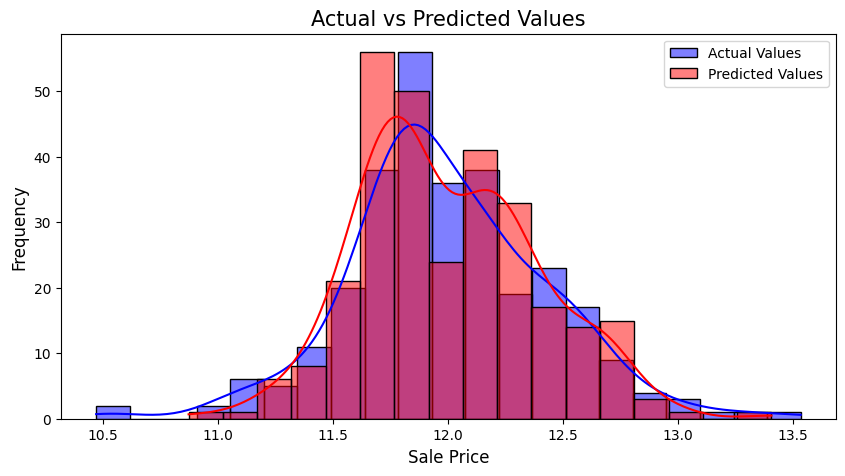

In [17]:
# Plot Predictions
plt.figure(figsize=(10, 5))
sns.histplot(y_test, kde=True, color='blue', label='Actual Values')
sns.histplot(y_pred, kde=True, color='red', label='Predicted Values')
plt.title('Actual vs Predicted Values', fontsize=15)
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

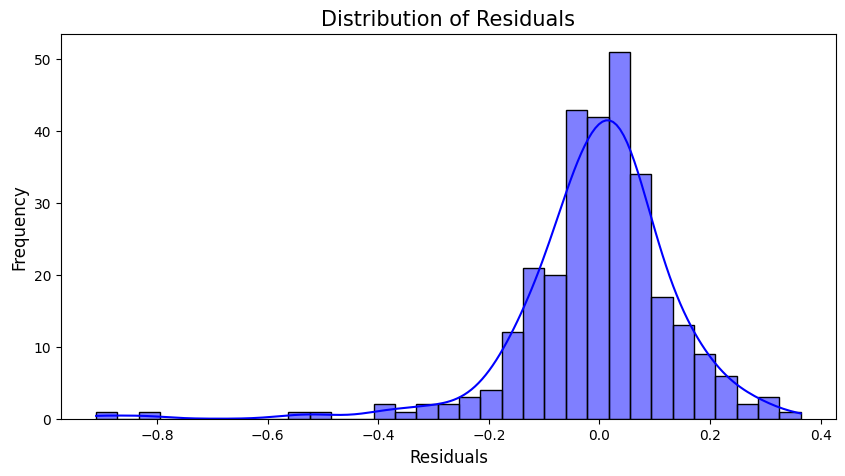

In [18]:
# Plot the Residuals
plt.figure(figsize=(10, 5))
sns.histplot(y_test - y_pred, kde=True, color='blue')
plt.title('Distribution of Residuals', fontsize=15)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

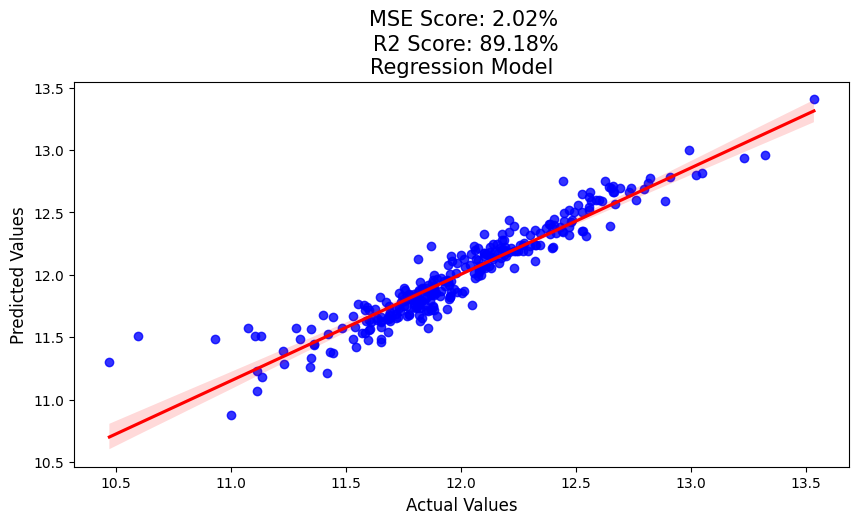

In [19]:
# Plot the regression Model using regplot and add accuracy on the plot as text
plt.figure(figsize=(10, 5))
sns.regplot(x=y_test, y=y_pred, color='blue',line_kws={"color": "red"})
plt.title('Regression Model', fontsize=15)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.text(11.62, 13.8, f'R2 Score: {r2_score(y_test, y_pred):0.2%}', fontsize=15)
plt.text(11.6, 14, f"MSE Score: {mean_squared_error(y_test, y_pred):0.2%}", fontsize=15)
plt.show()